In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st 
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
BankCallCenter=pd.read_excel('E:\Python\Data\BankCallCenter.xlsx','Data')
BankCallCenter.head()

,Account Number,Caller Gender,Account Holder\nSex,Past Due Amount,Current Amount\nDue,Was this a\nBilling Question?
0,4348291,2,2,40.35,82.85,3
1,6008516,1,1,0.00,-129.67,4
2,17476479,1,2,0.00,76.38,4
3,13846306,2,2,0.00,99.24,4
4,21393711,1,1,0.00,37.98,3


In [3]:
PastDueAmount=pd.read_excel('E:\Python\Data\BankCallCenter.xlsx','Data')[['Past Due Amount']]
PastDueAmount.head()

,Past Due Amount
0,40.35
1,0.00
2,0.00
3,0.00
4,0.00


In [4]:
PastDueAmount

,Past Due Amount
0,40.35
1,0.00
2,0.00
3,0.00
4,0.00
...,...
62,0.00
63,0.00
64,0.00
65,0.00


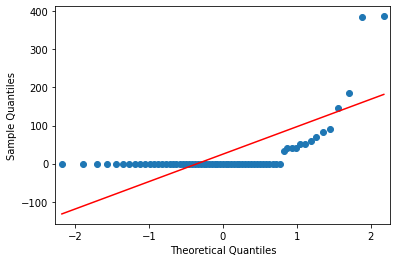

In [5]:
qqplot(PastDueAmount['Past Due Amount'], line='s')
pyplot.show()

In [34]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import shapiro
#(Shapiro Wikk Test) , sample size less than 50 
confidence_level = 0.95 #specify the confidence level
alpha = (1-confidence_level) #calculate alpha 
x = PastDueAmount['Past Due Amount']
stats, p = shapiro(x)
print('H_null - Data is normally distributed')
print('H_alt - Data is not normally distributed')
print()
print('Shapiro Statistics=%.3f, p_value=%.3f' % (stats, p))
print()

H_null - Data is normally distributed
H_alt - Data is not normally distributed

Shapiro Statistics=0.389, p_value=0.000



In [16]:
from scipy import stats
from scipy.stats import norm 
#(Kolmogorov Smirnov Test) , sample size more than 50 
confidence_level = 0.95 #specify the confidence level
alpha = (1-confidence_level) #calculate alpha 
x = PastDueAmount['Past Due Amount']
loc, scale = norm.fit(x) 
n = norm(loc=loc, scale=scale)# create a normal distribution with loc and s 
stats,p=stats.kstest(x,n.cdf) #return KS value and P-value
print('H_null - Data is normally distributed')
print('H_alt - Data is not normally distributed')
print()
#print('Kolmogorov-Smirnov Statistics=%.3f, p_value=%.3f' % (stats, p))
print('Kolmogorov-Smirnov Statistics=',stats, 'P-value', p)
print()

H_null - Data is normally distributed
H_alt - Data is not normally distributed

Kolmogorov-Smirnov Statistics= 0.42596783878423206 P-value 1.5041732458113143e-11



In [12]:
if p < alpha: 
    print('The null hypothesis is rejected') 
    print('Data is NOT NORMALLY distributed') 
else: 
    print('The null hypothesis is accepted') 
    print('Data is NORMALLY distributed')

print()

The null hypothesis is rejected
Data is NOT NORMALLY distributed



In [17]:
#hypothesis statement for non parametric one tail test
print('h_null: median past-due amount ≥ $20.00')
print('h_alt: median past-due amount < $20.00 (claim)')
#specify the confidence level
confidence_level= 0.90
#calculate significance level alpha
alpha=(1-confidence_level)
print()
print('Significance level, α=%.2f '%(alpha))

h_null: median past-due amount ≥ $20.00
h_alt: median past-due amount < $20.00 (claim)

Significance level, α=0.10 


In [18]:
from scipy import stats
from scipy.stats import wilcoxon
confidence_level = 0.90 #specify the confidence level
alpha = (1-confidence_level) #calculate alpha 
x = PastDueAmount['Past Due Amount']

stats,p = stats.wilcoxon(x)
print()
print('Wilcoxon Statistics=%.3f, p_value=%.3f' % (stats, p))


Wilcoxon Statistics=0.000, p_value=0.001


In [19]:
#decision on statistical test
if(p/2)<alpha:
    print('The null hypothesis is rejected as P-value is less than α ')
else:
    print('The null hypothesis is accepted as P-value is more than α')

The null hypothesis is rejected as P-value is less than α 
